# Bike Sharing Assingment 

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:





- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
- To know the accuracy of the model, i.e. how well these variables can predict house prices.

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [3]:
bike_rental = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
bike_rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Inspection
Inspect the various aspects of the bike_rental dataframe

In [5]:
bike_rental.shape

(730, 16)

In [6]:
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_rental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Cleaning

In [8]:
# Checking Null values
bike_rental.isnull().sum()*100/bike_rental.shape[0]
# There are no NULL values in the dataset, hence it is clean.

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [9]:
# no missing value is present  just need to correct the data type of dteday column

In [10]:
# convert dteday(object) to datetime data type
bike_rental['dteday'] = pd.to_datetime(bike_rental['dteday'])

In [11]:
bike_rental['dteday'].head()

0   2018-01-01
1   2018-02-01
2   2018-03-01
3   2018-04-01
4   2018-05-01
Name: dteday, dtype: datetime64[ns]

In [12]:
bike_rental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


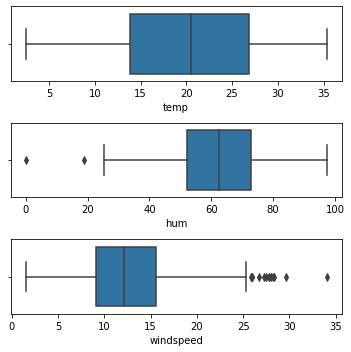

In [13]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(bike_rental['temp'], ax = axs[0])
plt2 = sns.boxplot(bike_rental['hum'], ax = axs[1])
plt3 = sns.boxplot(bike_rental['windspeed'], ax = axs[2])
plt.tight_layout()

In [14]:
# There are outiers in winspeed.

In [15]:
# we can drop some non usefull columns 
nonc=["instant","dteday","casual","registered"]

In [16]:
bike_rental.drop(nonc,axis=1,inplace=True)

## Exploratory Data Analysis

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's we will also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

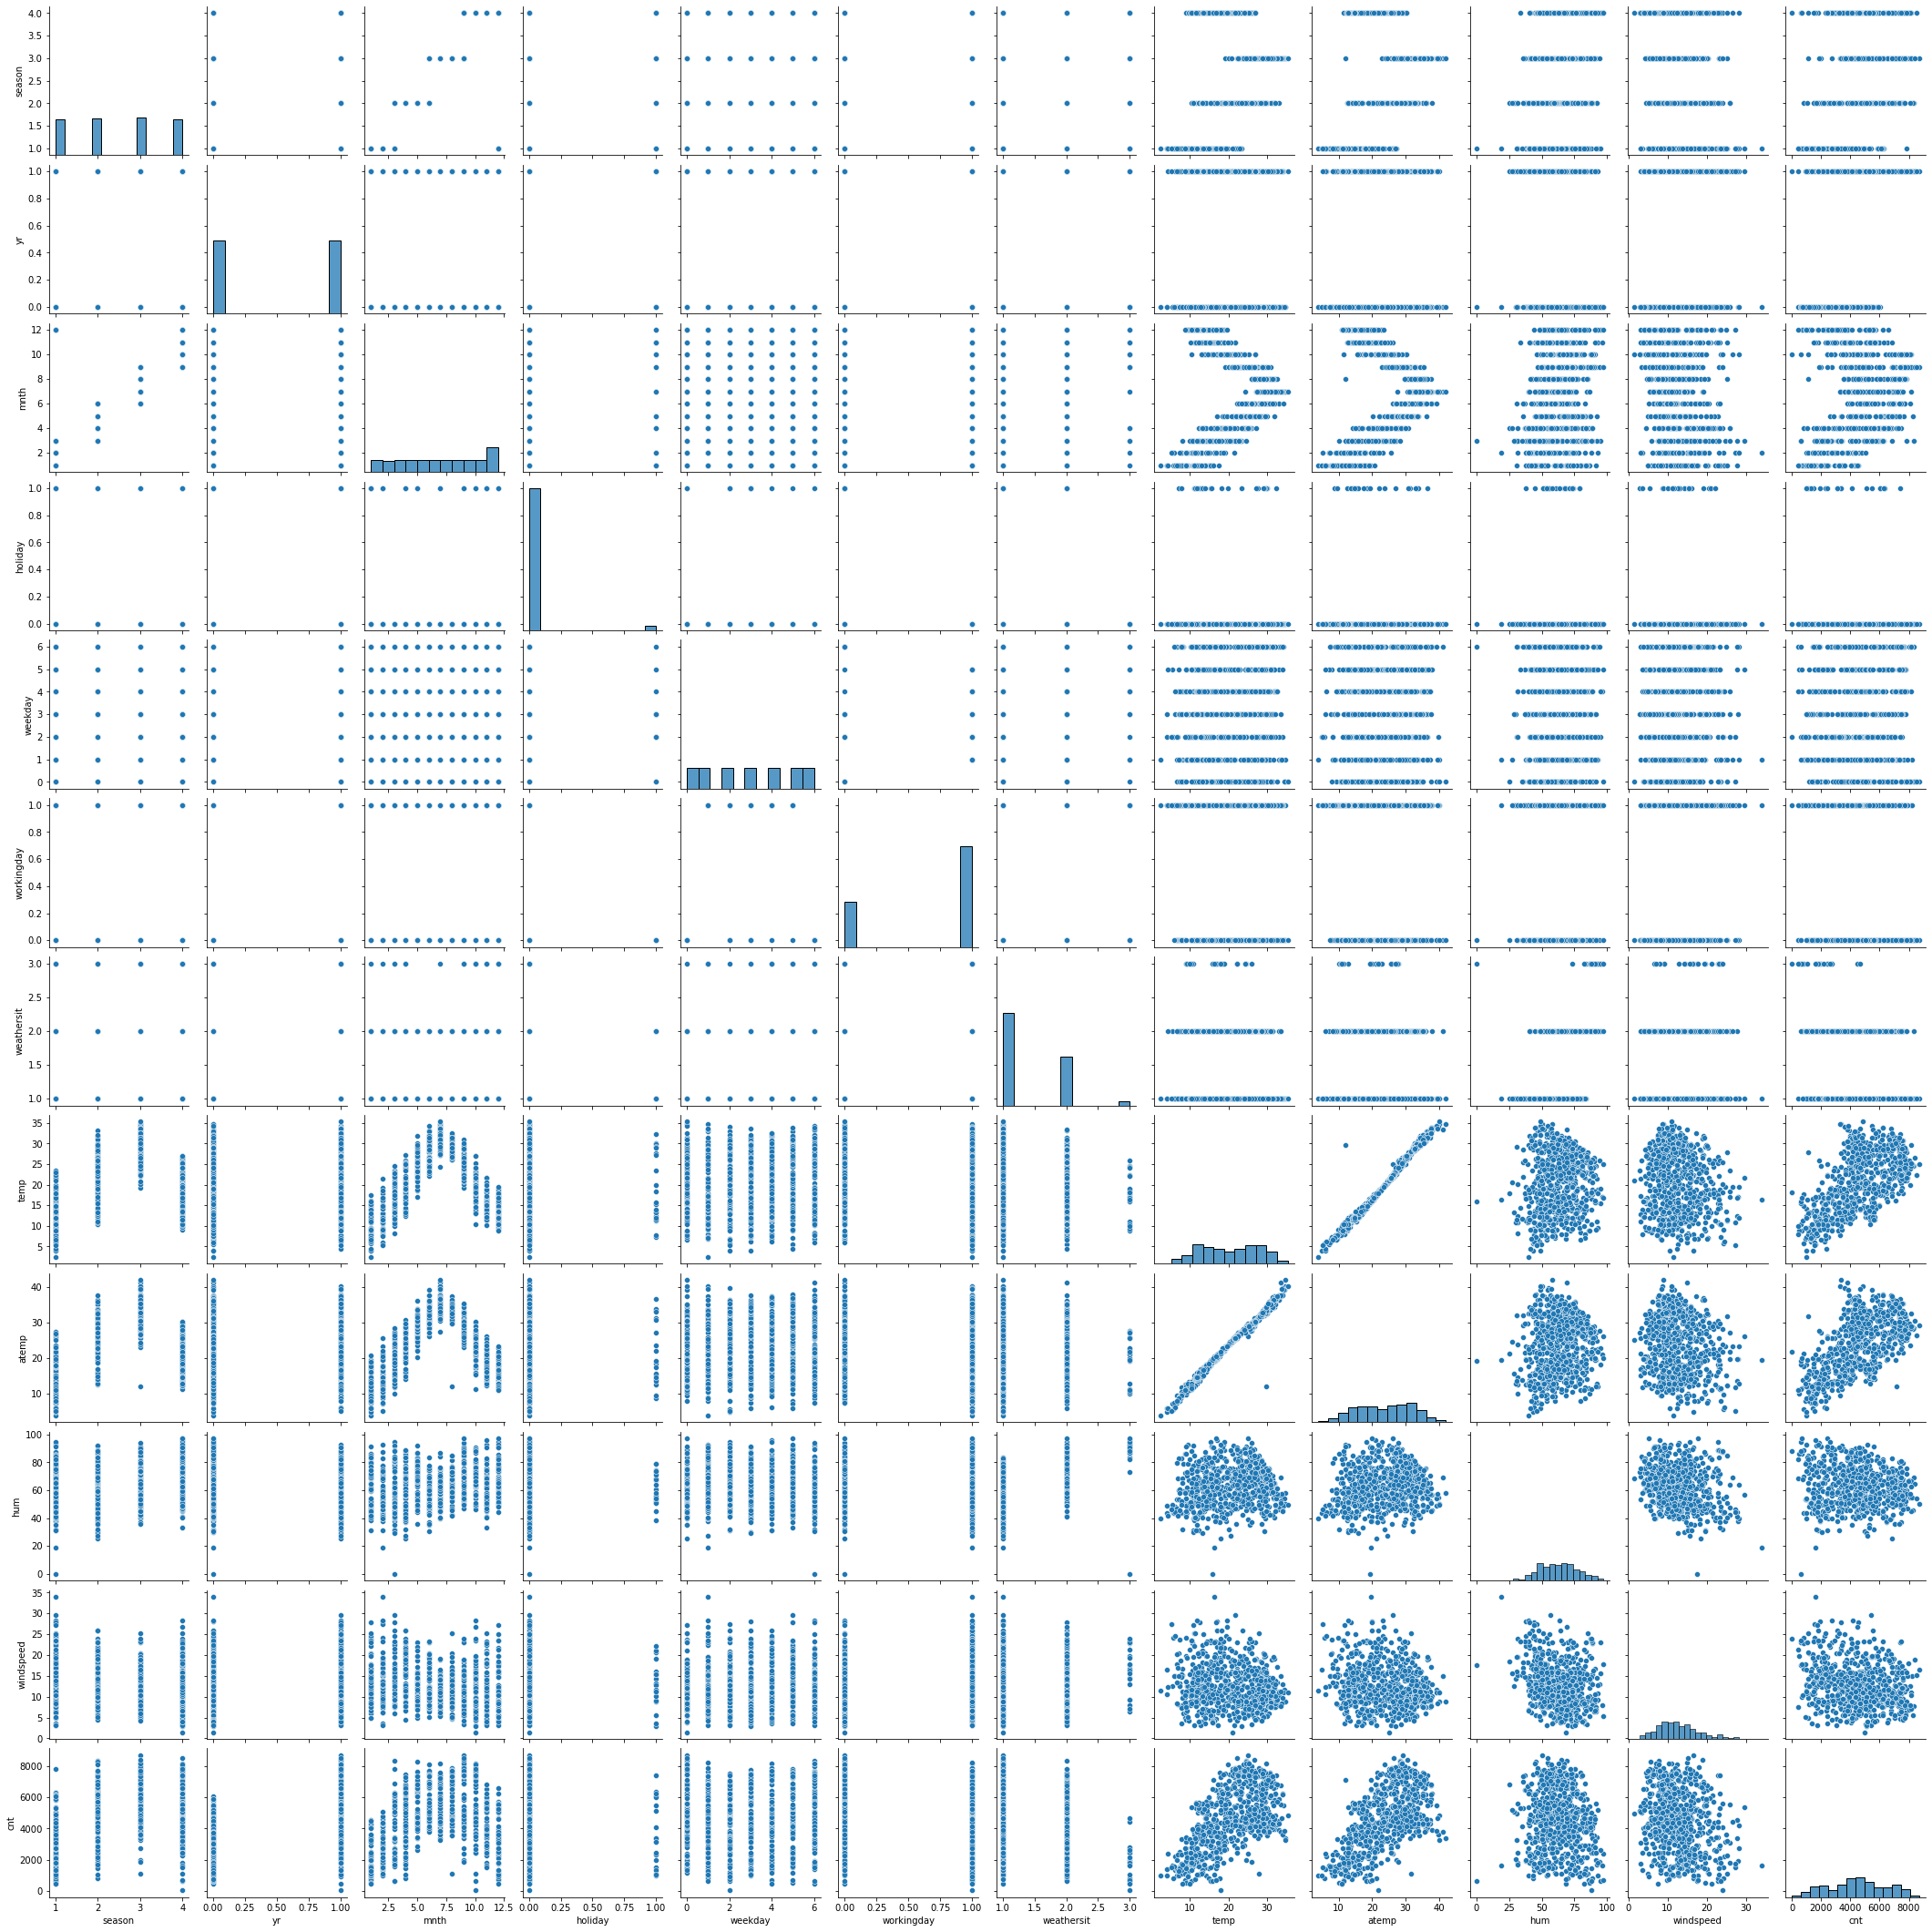

In [17]:
sns.pairplot(bike_rental)
plt.show()

### Observation
    1. It can be seen that temp and atemp are highly correlated
    2. temp  is showing positive correalation with count

#### Visualising Categorical Variables

As we have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

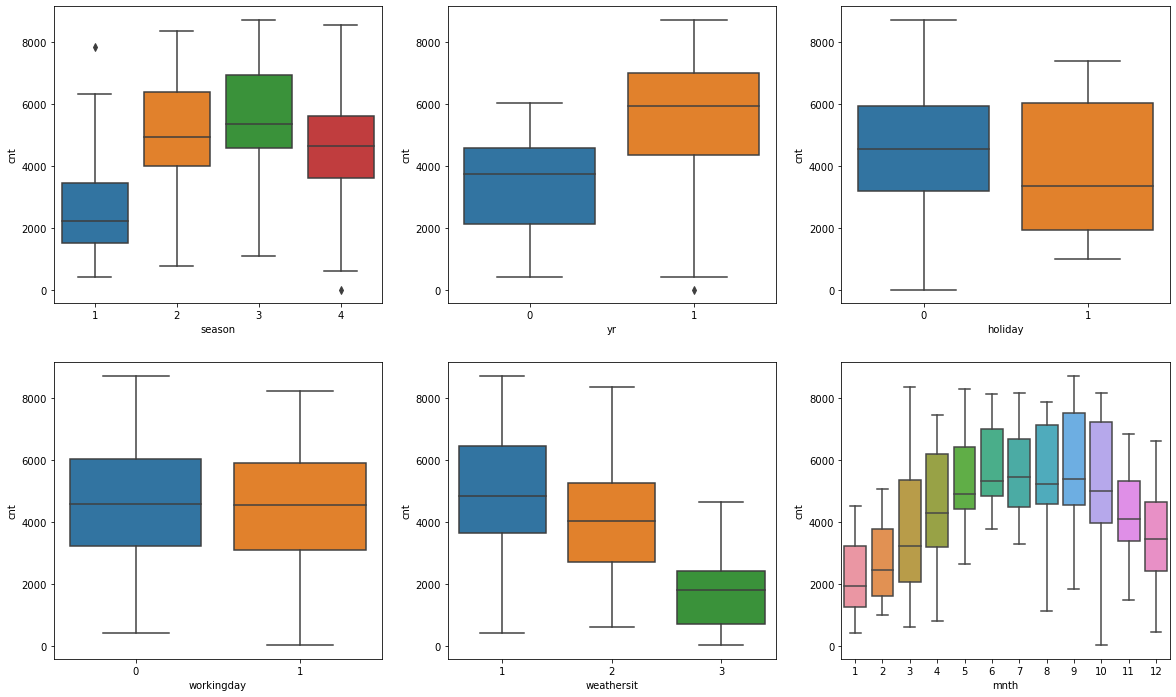

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_rental)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_rental)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_rental)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_rental)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_rental)
plt.subplot(2,3,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_rental)
plt.show()

### Observations
    1.In season 3 the demand is at the highest
    2.As compare to year 2018 in 2019 the demand for the bike is increasing
    3.On holidays the demand is less
    4.when the weather is clear the demand is high.
    5.working day is not giving some usefull insights.
    6. most demanded month is 9 which is sep.

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `season` with `yr` as the hue.

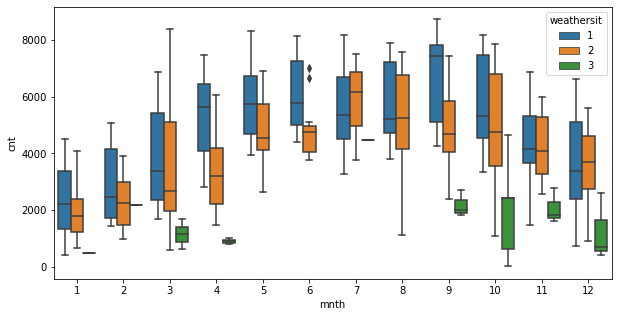

In [19]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'weathersit', data = bike_rental)
plt.show()

## Step 3: Data Preparation

### Dummy Variables

In [20]:
bike_rental["season"]=bike_rental["season"].map({1:"spring",2:"summer",3:"fall",4:"winter"})

In [21]:
bike_rental["mnth"]=bike_rental["mnth"].map({1:"jan",2:"feb",3:"march",4:"april",5:"may",6:"june",7:"july",8:"aug",9:"sep",10:"oct" ,11:"nov", 12: "dec"})

In [22]:
bike_rental["weekday"]=bike_rental["weekday"].map({0:"sun",1:"mon",2:"tues",3:"wed",4:"thursday",5:"friday",6:"sat",})

In [23]:
bike_rental["weathersit"]=bike_rental["weathersit"].map({1:"clear",2:"mist",3:"Light snow",4:"Heavy rain"})

In [24]:
# Get the dummy variables for the feature 'season' and drop the first column from it df using 'drop_first = True'
# we can use drop_first = True to drop the first column from seasondummy dataframe.

seasondummy = pd.get_dummies(bike_rental["season"], drop_first = True)

In [25]:
seasondummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0



- `000` will correspond to `Fall	`
- `001` will correspond to `winter `
- `010` will correspond to `summer`
- `100` will correspond to `spring`

In [26]:
# Get the dummy variables for the feature 'mnth' and drop the first column from it df using 'drop_first = True'

mnthdummy = pd.get_dummies(bike_rental["mnth"], drop_first = True)

In [27]:
mnthdummy.head()

,aug,dec,feb,jan,july,june,march,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [28]:
# Get the dummy variables for the feature 'weekday' and drop the first column from it df using 'drop_first = True'

weekdaydummy = pd.get_dummies(bike_rental["weekday"], drop_first = True)

In [29]:
# Get the dummy variables for the feature 'weathersit' and drop the first column from it df using 'drop_first = True'

weatherdummy = pd.get_dummies(bike_rental["weathersit"], drop_first = True)

In [30]:
weatherdummy.head()

,clear,mist
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


Now, you don't need three columns. You can drop the `Light snow` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will correspond to `Light snow	`
- `01` will correspond to `mist`
- `10` will correspond to `clear`

In [31]:
# Add the results to the original bike_rental dataframe

bike_rental= pd.concat([bike_rental, seasondummy,mnthdummy,weekdaydummy,weatherdummy], axis = 1)

In [32]:
# Drop original columns  as we have created the dummies for it
bike_rental.drop(['season',"weathersit","mnth","weekday",], axis = 1, inplace = True)

In [33]:
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  aug         730 non-null    uint8  
 12  dec         730 non-null    uint8  
 13  feb         730 non-null    uint8  
 14  jan         730 non-null    uint8  
 15  july        730 non-null    uint8  
 16  june        730 non-null    uint8  
 17  march       730 non-null    uint8  
 18  may         730 non-null    uint8  
 19  nov         730 non-null    u

## Step 4: Splitting the Data into Training and Testing Sets

 the first basic step for regression is performing a train-test split

In [34]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_rental, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In [35]:
# Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler=MinMaxScaler()

In [37]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp',"atemp", 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [38]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thursday,tues,wed,clear,mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [39]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thursday,tues,wed,clear,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.627451,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


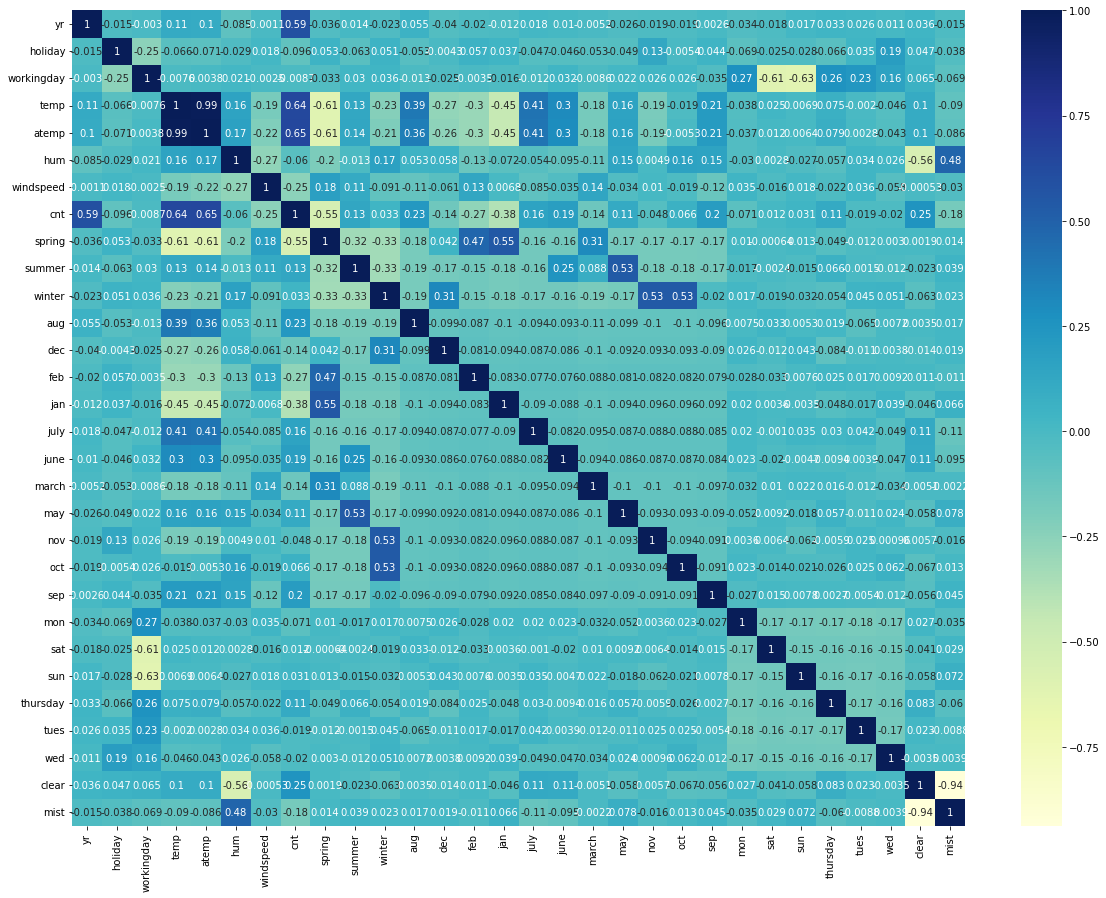

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [41]:
y_train=df_train.pop("cnt")
X_train=df_train

## Step 5: Building a linear model
 we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature eliminationimport statsmodels.api as sm

In [42]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('march', False, 15),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thursday', False, 13),
 ('tues', False, 8),
 ('wed', False, 11),
 ('clear', True, 1),
 ('mist', True, 1)]

In [44]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'july', 'nov', 'sep', 'clear', 'mist'],
      dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'march', 'may', 'oct',
       'mon', 'sat', 'sun', 'thursday', 'tues', 'wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

### Model 1

In [46]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_rfe)

 # Running the linear model
lr1 = sm.OLS(y_train, X_train_sm)
lr1_model = lr1.fit()


#Let's see the summary of our linear model
lr1_model.summary()






<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          3.34e-189
Time:                        11:34:12   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.047      1.519      0.129      -0.021       0.165
yr             0.2303      0.008     28.511      0.000       0.214       0.246
holiday       -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp           0.4800      0.037     12.977      0.000       0.407       0.553
hum           -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed     -0.1885      0.026     -7.312      0.000      -0.239      -0.138
spring        -0.0617      0.021     -2.907      0.004      -0.103      -0.020
summer         0.0408      0.015      2.659      0.008       0.011       0.071
winter         0.1034      0.018      5.763      0.000       0.068       0.139
dec           -0.0372      0.017     -2.131      0.034      -0.071      -0.003
jan           -0.0437      0.018     -2.415      0.016      -0.079      -0.008
july          -0.0555      0.018     -3.046      0.002      -0.091      -0.020
nov           -0.0409      0.019     -2.187      0.029      -0.078      -0.004
sep            0.0749      0.017      4.438      0.000       0.042       0.108
clear          0.2481      0.026      9.402      0.000       0.196       0.300
mist           0.1922      0.025      7.697      0.000       0.143       0.241
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,26.36
2,temp,25.12
13,clear,15.69
14,mist,9.25
5,spring,5.75
4,windspeed,4.67
7,winter,4.54
6,summer,3.28
0,yr,2.10
11,nov,1.89


### Observation:
In the above model we see high vif value for "hum" which make its highly correlated . We will proceed ahead with dropping this feature and designing model again

### Model 2

In [48]:
col = col.drop(['hum'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr2 = sm.OLS(y_train, X_train_sm)
lr2_model = lr2.fit()
lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.57e-186
Time:                        11:34:12   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0463      0.039     -1.184      0.237      -0.123       0.030
yr             0.2343      0.008     28.709      0.000       0.218       0.250
holiday       -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp           0.4377      0.036     12.083      0.000       0.366       0.509
windspeed     -0.1586      0.025     -6.290      0.000      -0.208      -0.109
spring        -0.0716      0.021     -3.337      0.001      -0.114      -0.029
summer         0.0333      0.015      2.148      0.032       0.003       0.064
winter         0.0887      0.018      4.951      0.000       0.053       0.124
dec           -0.0445      0.018     -2.520      0.012      -0.079      -0.010
jan           -0.0503      0.018     -2.738      0.006      -0.086      -0.014
july          -0.0504      0.018     -2.725      0.007      -0.087      -0.014
nov           -0.0419      0.019     -2.198      0.028      -0.079      -0.004
sep            0.0682      0.017      3.992      0.000       0.035       0.102
clear          0.2929      0.025     11.908      0.000       0.245       0.341
mist           0.2114      0.025      8.466      0.000       0.162       0.261
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,clear,15.68
2,temp,14.00
13,mist,8.77
3,windspeed,4.65
4,spring,4.40
6,winter,3.36
5,summer,2.76
0,yr,2.08
10,nov,1.87
8,jan,1.74


### Observation:
In the above model we see high vif value for "clear" which make its highly correlated . We will proceed ahead with dropping this feature and designing model again

### Model 3

In [50]:
col = col.drop(['clear'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr3 = sm.OLS(y_train, X_train_sm)
lr3_model = lr3.fit()
lr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.08e-160
Time:                        11:34:12   Log-Likelihood:                 441.37
No. Observations:                 510   AIC:                            -854.7
Df Residuals:                     496   BIC:                            -795.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2198      0.036      6.054      0.000       0.148       0.291
yr             0.2398      0.009     25.974      0.000       0.222       0.258
holiday       -0.0806      0.029     -2.734      0.006      -0.138      -0.023
temp           0.4664      0.041     11.389      0.000       0.386       0.547
windspeed     -0.1862      0.028     -6.546      0.000      -0.242      -0.130
spring        -0.0609      0.024     -2.505      0.013      -0.109      -0.013
summer         0.0402      0.018      2.294      0.022       0.006       0.075
winter         0.0748      0.020      3.696      0.000       0.035       0.115
dec           -0.0276      0.020     -1.383      0.167      -0.067       0.012
jan           -0.0406      0.021     -1.956      0.051      -0.081       0.000
july          -0.0534      0.021     -2.549      0.011      -0.095      -0.012
nov           -0.0248      0.022     -1.154      0.249      -0.067       0.017
sep            0.0617      0.019      3.189      0.002       0.024       0.100
mist          -0.0677      0.010     -6.926      0.000      -0.087      -0.048
==============================================================================
Omnibus:                      146.814   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.237
Skew:                          -1.261   Prob(JB):                    9.07e-125
Kurtosis:                       7.530   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.60
4,spring,2.89
6,winter,2.88
5,summer,2.23
0,yr,2.07
10,nov,1.79
8,jan,1.66
9,july,1.59
12,mist,1.54


### Observation:
In the above model we see high p- value for "nov" which make its co-efficient insignificant. We will proceed ahead with dropping this feature and designing model again

### Model 4

In [52]:
col = col.drop(['nov'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr4 = sm.OLS(y_train, X_train_sm)
lr4_model = lr4.fit()
lr4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     159.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.63e-161
Time:                        11:34:12   Log-Likelihood:                 440.69
No. Observations:                 510   AIC:                            -855.4
Df Residuals:                     497   BIC:                            -800.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2094      0.035      5.952      0.000       0.140       0.279
yr             0.2397      0.009     25.954      0.000       0.222       0.258
holiday       -0.0847      0.029     -2.898      0.004      -0.142      -0.027
temp           0.4784      0.040     12.078      0.000       0.401       0.556
windspeed     -0.1865      0.028     -6.555      0.000      -0.242      -0.131
spring        -0.0558      0.024     -2.335      0.020      -0.103      -0.009
summer         0.0436      0.017      2.523      0.012       0.010       0.078
winter         0.0691      0.020      3.519      0.000       0.031       0.108
dec           -0.0186      0.018     -1.013      0.312      -0.055       0.017
jan           -0.0376      0.021     -1.825      0.069      -0.078       0.003
july          -0.0533      0.021     -2.543      0.011      -0.094      -0.012
sep            0.0652      0.019      3.409      0.001       0.028       0.103
mist          -0.0674      0.010     -6.893      0.000      -0.087      -0.048
==============================================================================
Omnibus:                      139.682   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              514.521
Skew:                          -1.215   Prob(JB):                    1.88e-112
Kurtosis:                       7.279   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.56
4,spring,2.89
5,summer,2.23
0,yr,2.07
6,winter,2.02
8,jan,1.65
9,july,1.59
11,mist,1.54
10,sep,1.34


### Observation:
In the above model we see high p- value for "dec" which make its co-efficient insignificant. We will proceed ahead with dropping this feature and designing model again

### Model 5

In [54]:
col = col.drop(['dec'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr5 = sm.OLS(y_train, X_train_sm)
lr5_model = lr5.fit()
lr5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     173.5
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.01e-162
Time:                        11:34:12   Log-Likelihood:                 440.16
No. Observations:                 510   AIC:                            -856.3
Df Residuals:                     498   BIC:                            -805.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2010      0.034      5.879      0.000       0.134       0.268
yr             0.2397      0.009     25.953      0.000       0.222       0.258
holiday       -0.0839      0.029     -2.869      0.004      -0.141      -0.026
temp           0.4876      0.039     12.644      0.000       0.412       0.563
windspeed     -0.1835      0.028     -6.484      0.000      -0.239      -0.128
spring        -0.0549      0.024     -2.297      0.022      -0.102      -0.008
summer         0.0456      0.017      2.654      0.008       0.012       0.079
winter         0.0680      0.020      3.469      0.001       0.029       0.107
jan           -0.0331      0.020     -1.645      0.101      -0.073       0.006
july          -0.0536      0.021     -2.557      0.011      -0.095      -0.012
sep            0.0667      0.019      3.498      0.001       0.029       0.104
mist          -0.0674      0.010     -6.899      0.000      -0.087      -0.048
==============================================================================
Omnibus:                      137.324   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              497.840
Skew:                          -1.199   Prob(JB):                    7.86e-109
Kurtosis:                       7.205   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.55
4,spring,2.75
5,summer,2.22
0,yr,2.07
6,winter,1.76
7,jan,1.61
8,july,1.59
10,mist,1.53
9,sep,1.33


### Observation:
In the above model we see high p- value for "jan" which make its co-efficient insignificant. We will proceed ahead with dropping this feature and designing model again

### Model 6

In [56]:
col = col.drop(['jan'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr6 = sm.OLS(y_train, X_train_sm)
lr6_model = lr6.fit()
lr6_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     189.9
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          5.44e-163
Time:                        11:34:12   Log-Likelihood:                 438.78
No. Observations:                 510   AIC:                            -855.6
Df Residuals:                     499   BIC:                            -809.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1872      0.033      5.638      0.000       0.122       0.252
yr             0.2390      0.009     25.862      0.000       0.221       0.257
holiday       -0.0845      0.029     -2.887      0.004      -0.142      -0.027
temp           0.5039      0.037     13.497      0.000       0.431       0.577
windspeed     -0.1773      0.028     -6.311      0.000      -0.232      -0.122
spring        -0.0597      0.024     -2.511      0.012      -0.106      -0.013
summer         0.0483      0.017      2.817      0.005       0.015       0.082
winter         0.0733      0.019      3.785      0.000       0.035       0.111
july          -0.0550      0.021     -2.625      0.009      -0.096      -0.014
sep            0.0671      0.019      3.515      0.000       0.030       0.105
mist          -0.0682      0.010     -6.980      0.000      -0.087      -0.049
==============================================================================
Omnibus:                      137.062   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              497.223
Skew:                          -1.196   Prob(JB):                    1.07e-108
Kurtosis:                       7.204   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.54
5,summer,2.21
4,spring,2.08
0,yr,2.06
6,winter,1.76
7,july,1.58
9,mist,1.52
8,sep,1.33
1,holiday,1.04


### Observation:
In the above model, we see all p- values are less then 0.05  and the vif values are also under 5 except the temp, which is a very important variable. We can't drop that on having vif value 5.09, which is acceptable.

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [58]:
y_train_cnt = lr6_model.predict(X_train_sm)

Text(0.5, 0, 'Errors')

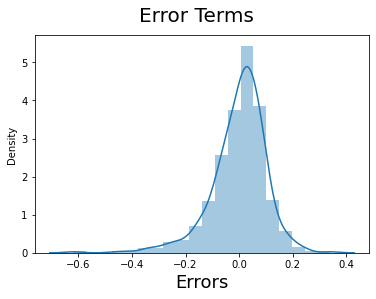

In [59]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. sixth model.

#### Applying the scaling on the test sets

In [60]:
num_vars =['temp',"atemp", 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [61]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thursday,tues,wed,clear,mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.652968,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.477117,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [62]:
y_test = df_test.pop('cnt')
X_test = df_test

In [63]:
X_test_new=X_test[X_train_rfe.columns]

In [64]:
# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test_new)

In [65]:

y_pred = lr6_model.predict(X_test_new)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

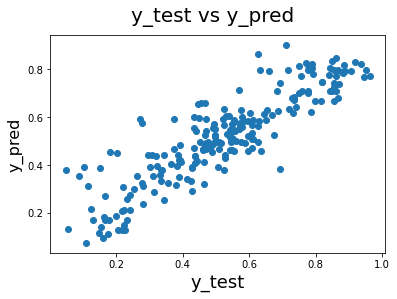

In [66]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

We can see that the equation of our best fitted line is:

$ cnt = 0.239  \times  yr - 0.0845  \times  holiday + 0.5039 \times temp - 0.1773 \times windspeed - 0.0597 \times spring + 0.0483 \times summer + 0.0733 \times winter - 0.055 \times july + 0.0671 \times sep - 0.0682 \times mist + 0.1872 $


In [67]:
from sklearn.metrics import r2_score
r2_score(y_test,  y_pred)

0.7778798147259003

In [68]:
import jovian

In [70]:

jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dkm1996-dm/bike-sharing-assingment-dheeraj-mishra" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/dkm1996-dm/bike-sharing-assingment-dheeraj-mishra


'https://jovian.ai/dkm1996-dm/bike-sharing-assingment-dheeraj-mishra'